## Predicting Diabetes Outcome
### Based on Patient Data for Pima Indian Women Over 21 Years Old

In [115]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#importing dataset into dataframe
data = pd.read_csv(r'C:\Users\karol\Desktop\data analyst\caltech bootcmap\course 8 - capstone project\health care diabetes.csv', dtype = {'Ferry Direction' : str, "Ferry Terminal Name" : str})


"""
VARIABLES:


Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


"""


'\nVARIABLES:\n\n\nPregnancies: Number of times pregnant\nGlucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test\nBloodPressure: Diastolic blood pressure (mm Hg)\nSkinThickness: Triceps skin fold thickness (mm)\nInsulin: 2-Hour serum insulin (mu U/ml)\nBMI: Body mass index (weight in kg/(height in m)^2)\nDiabetesPedigreeFunction: Diabetes pedigree function\nAge: Age (years)\nOutcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0\n\n\n'

In [116]:
data.shape

(768, 9)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
data.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [119]:
#there are no missing variables

#return any duplicate rows

data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [120]:
#no duplicates!

#checking the first 5 rows for general data structure and any issues

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

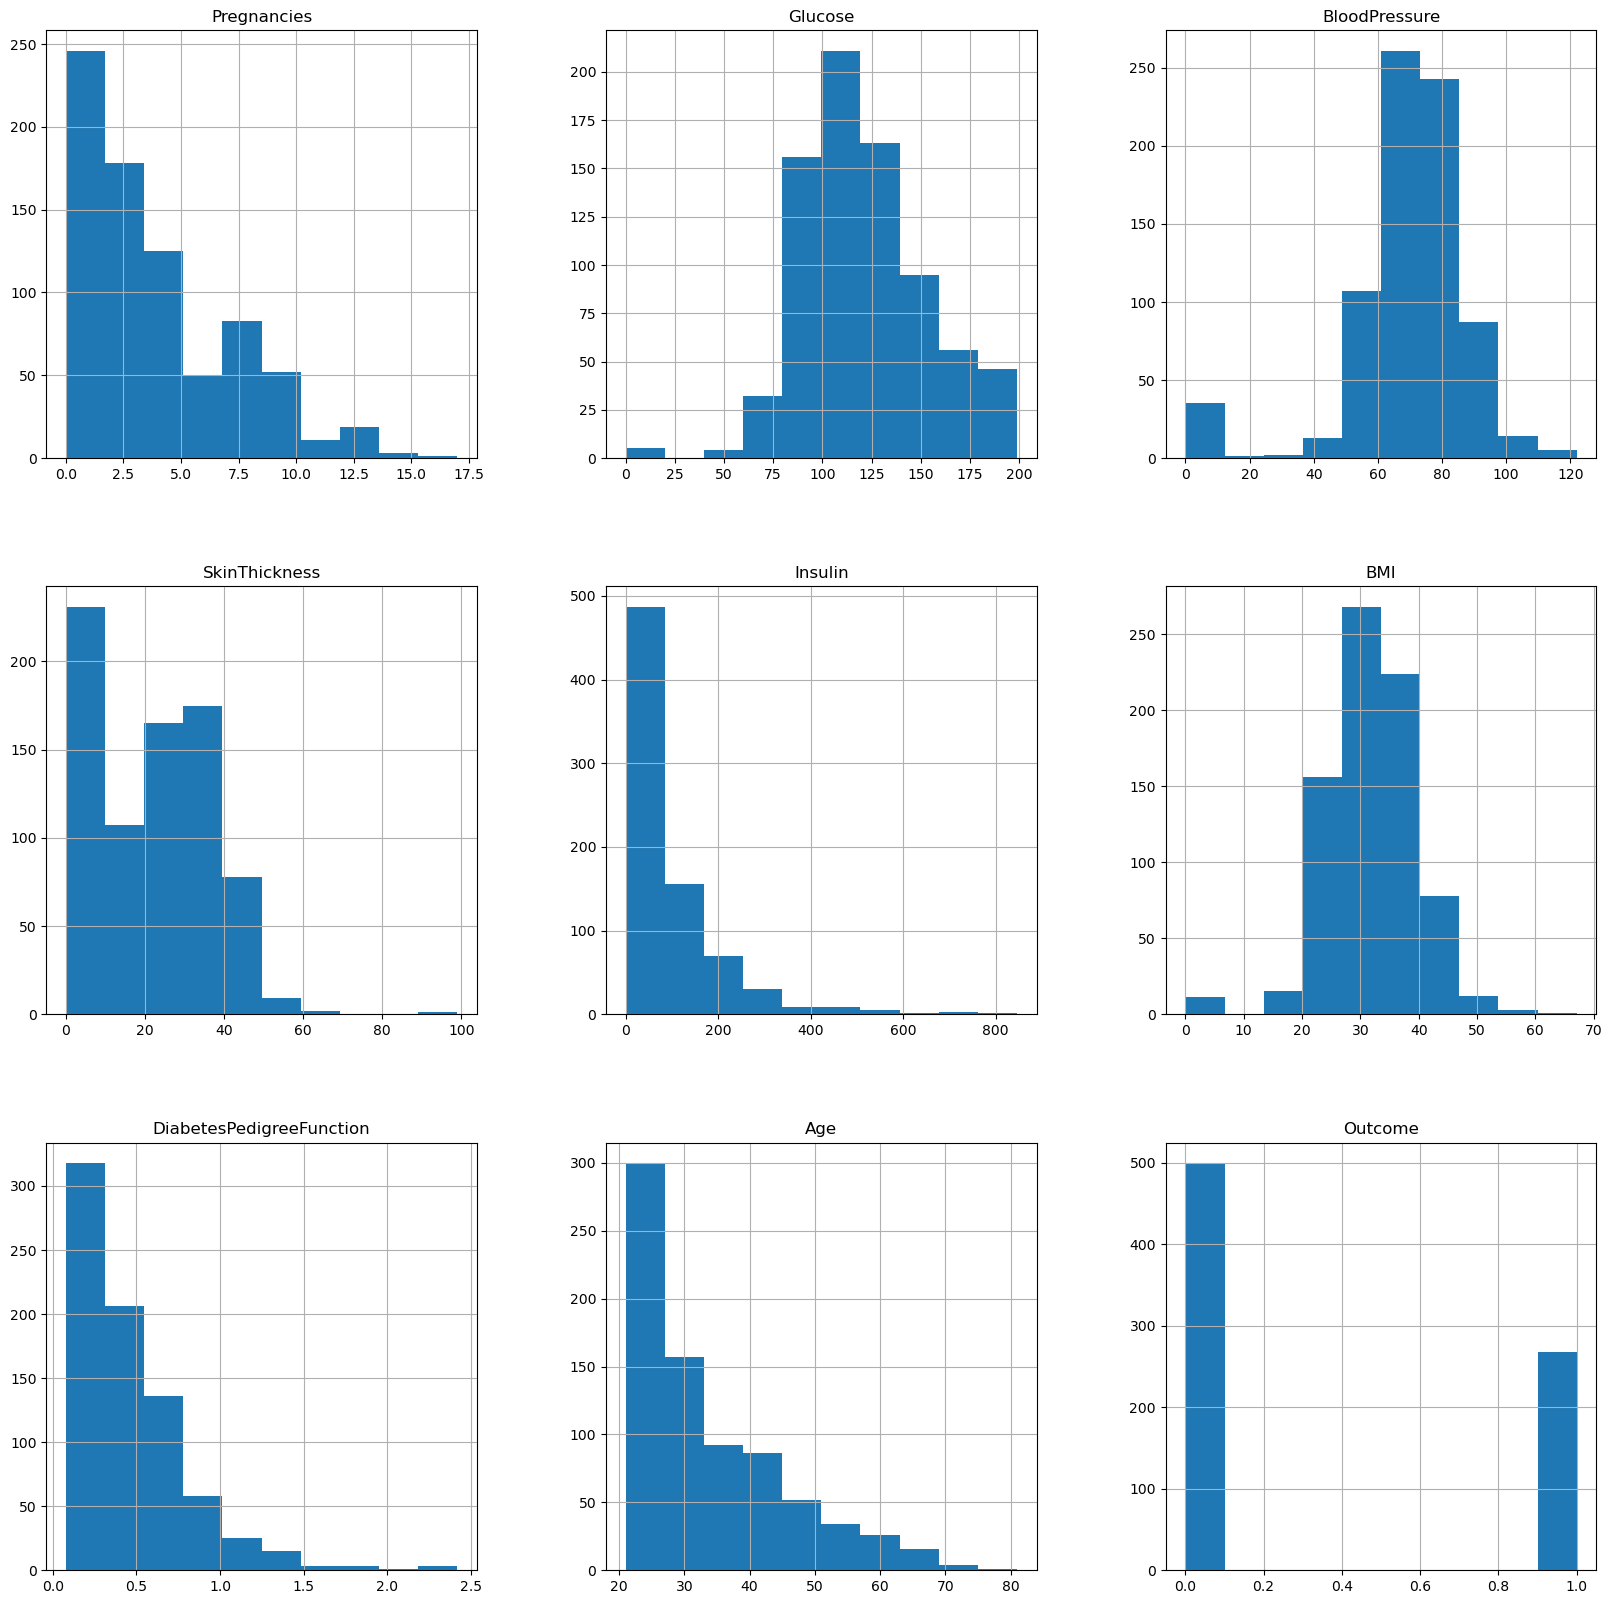

In [121]:
#0 values for the variables Glucose, BloodPressure, SkinThickness, Insulin and BMI do not make sense
#will change them to NaN values to count after making distribution plots to see their impact on the rest of the data

data.hist(figsize = (20,20))

In [122]:
#Glucose, BloodPressure and BMI have only outlier 0 values - there aren't many
#Insulin and SkinThickness have a significant number of 0 values in a skewed distribution

#will fill these 0 values with mean values for Glucose, BloodPressure, and BMI and median for Insulin and SkinThickness
#this is due to the shape of their distribution



#changing 0 values to Nan values to be filled

data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = data[["Glucose", "BloodPressure", 
                                                   "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)


In [123]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [124]:
#filling the Nan values with mean/median values

data["Glucose"].fillna(data["Glucose"].mean(),inplace = True)
data["BloodPressure"].fillna(data["BloodPressure"].mean(),inplace = True)
data["BMI"].fillna(data["BMI"].mean(),inplace = True)
data["Insulin"].fillna(data["Insulin"].median(),inplace = True)
data["SkinThickness"].fillna(data["SkinThickness"].median(),inplace = True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

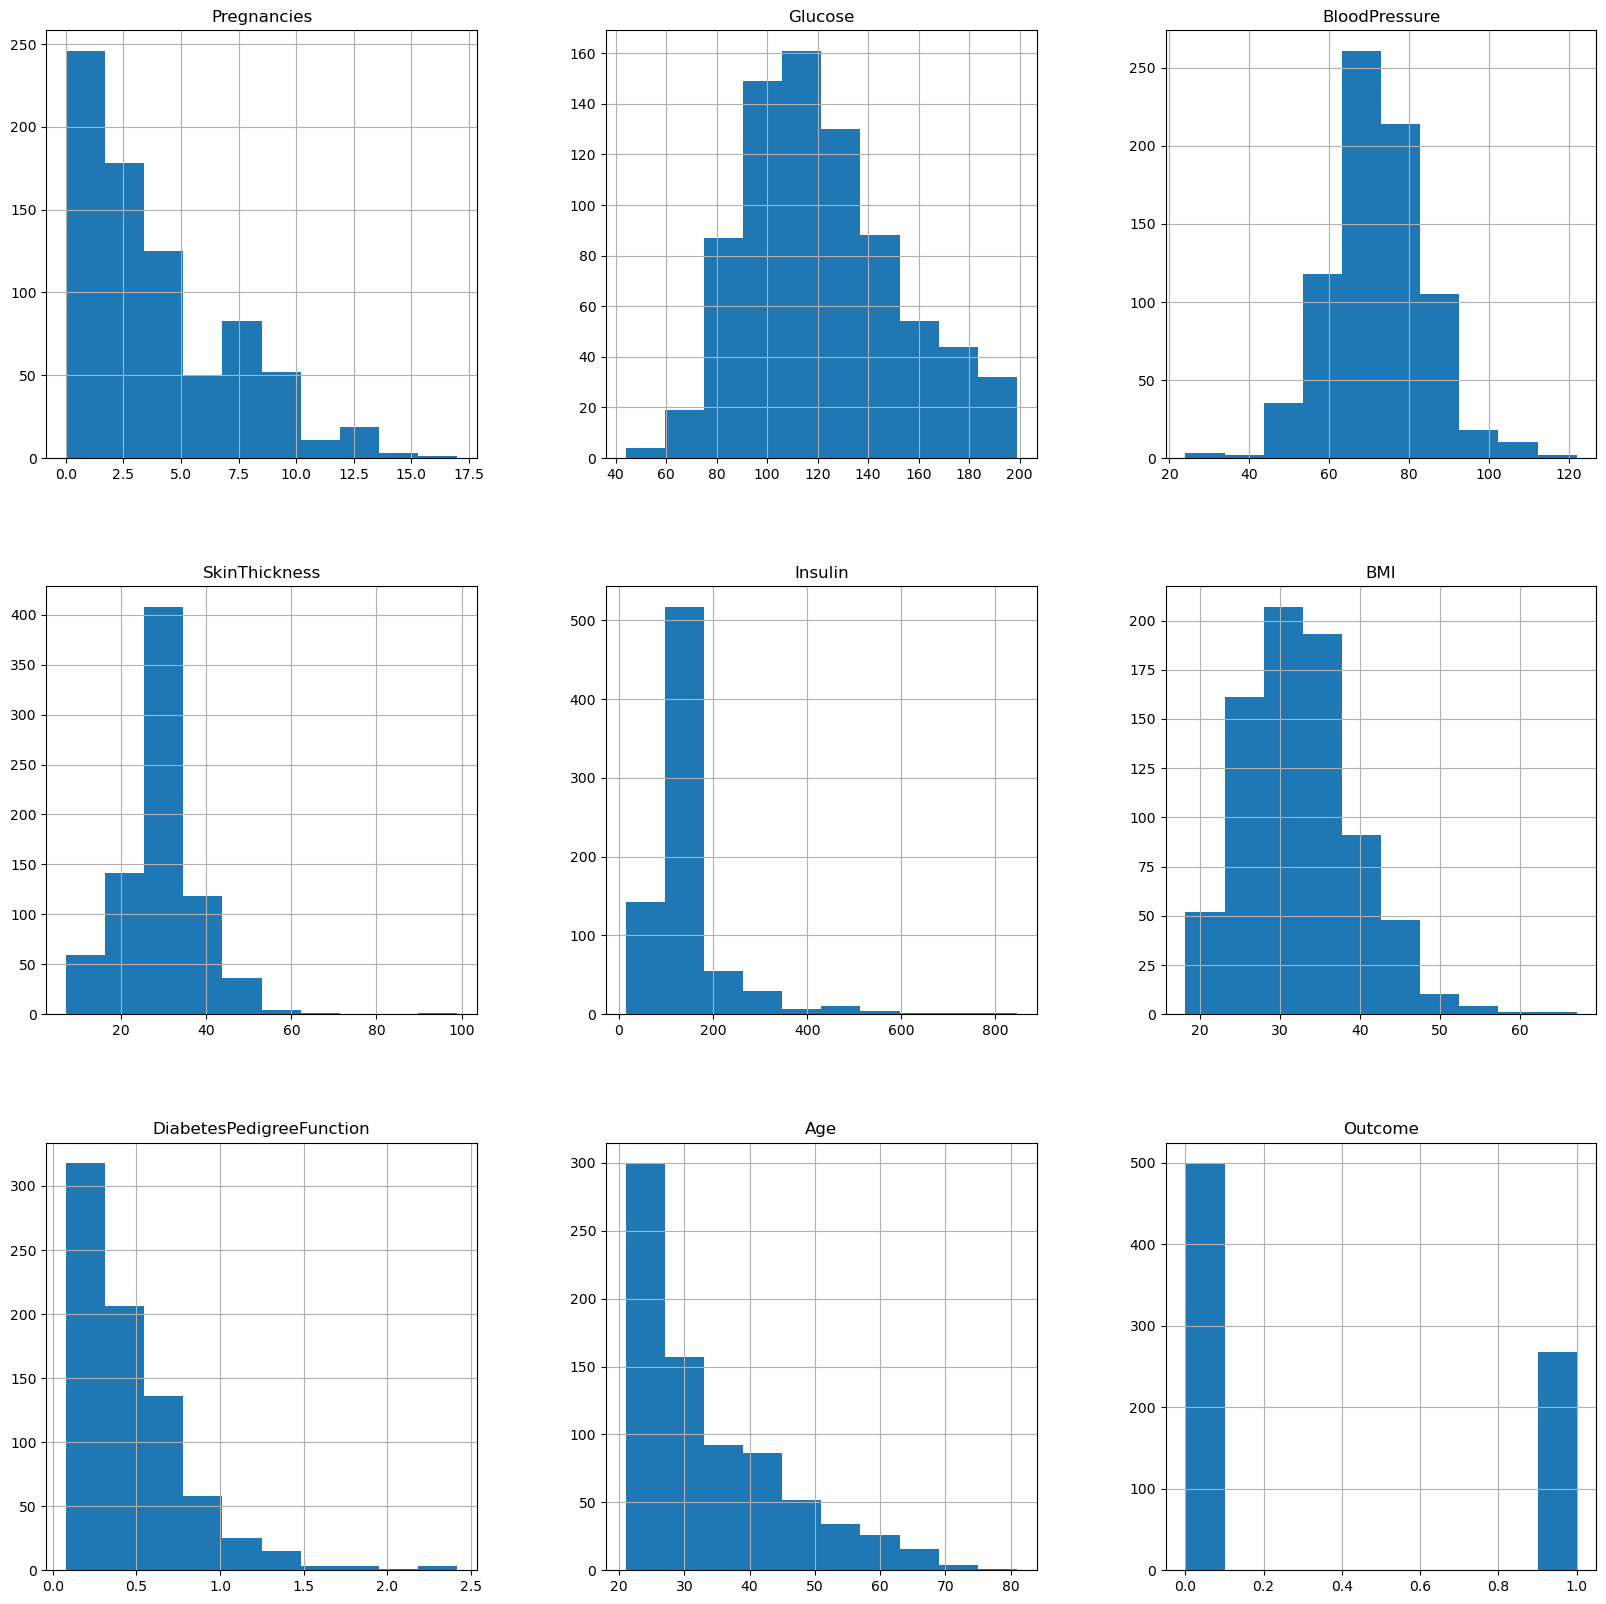

In [125]:
#visualizing variable distrivutions after "missing" value treatment

data.hist(figsize=(20,20))

Text(0.5, 1.0, 'Distribution of Data Types in Dataset')

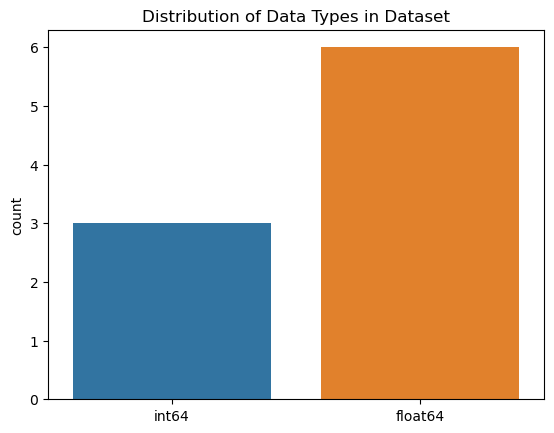

In [126]:
#earlier it was noticed that there are two datatypes in this dataset, float and int

#countplot of the datatype distribution

sns.countplot(data=data, x=data.dtypes)
plt.title("Distribution of Data Types in Dataset")

Text(0.5, 1.0, 'Distribution of the Outcome Variable (0 = no diabetes, 1 = diabetes)')

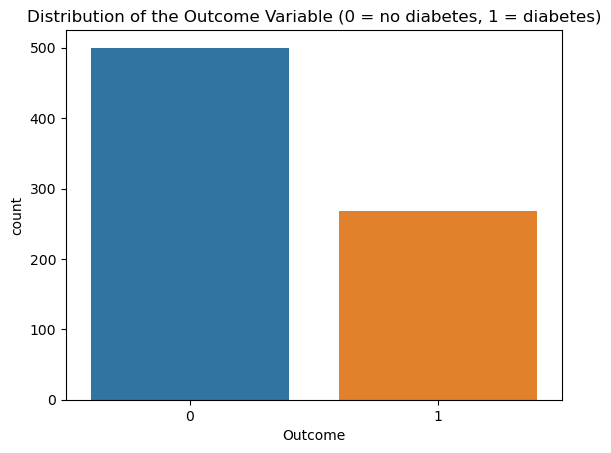

In [127]:
#countplot of the distribution of the Outcome variable

sns.countplot(data=data, x="Outcome")
plt.title("Distribution of the Outcome Variable (0 = no diabetes, 1 = diabetes)")

In [128]:
#The number of subjects without diabetes (outcome value 0) is nearly double the subjects with diabetes (outcome value 1)
#this shows a skew in the data

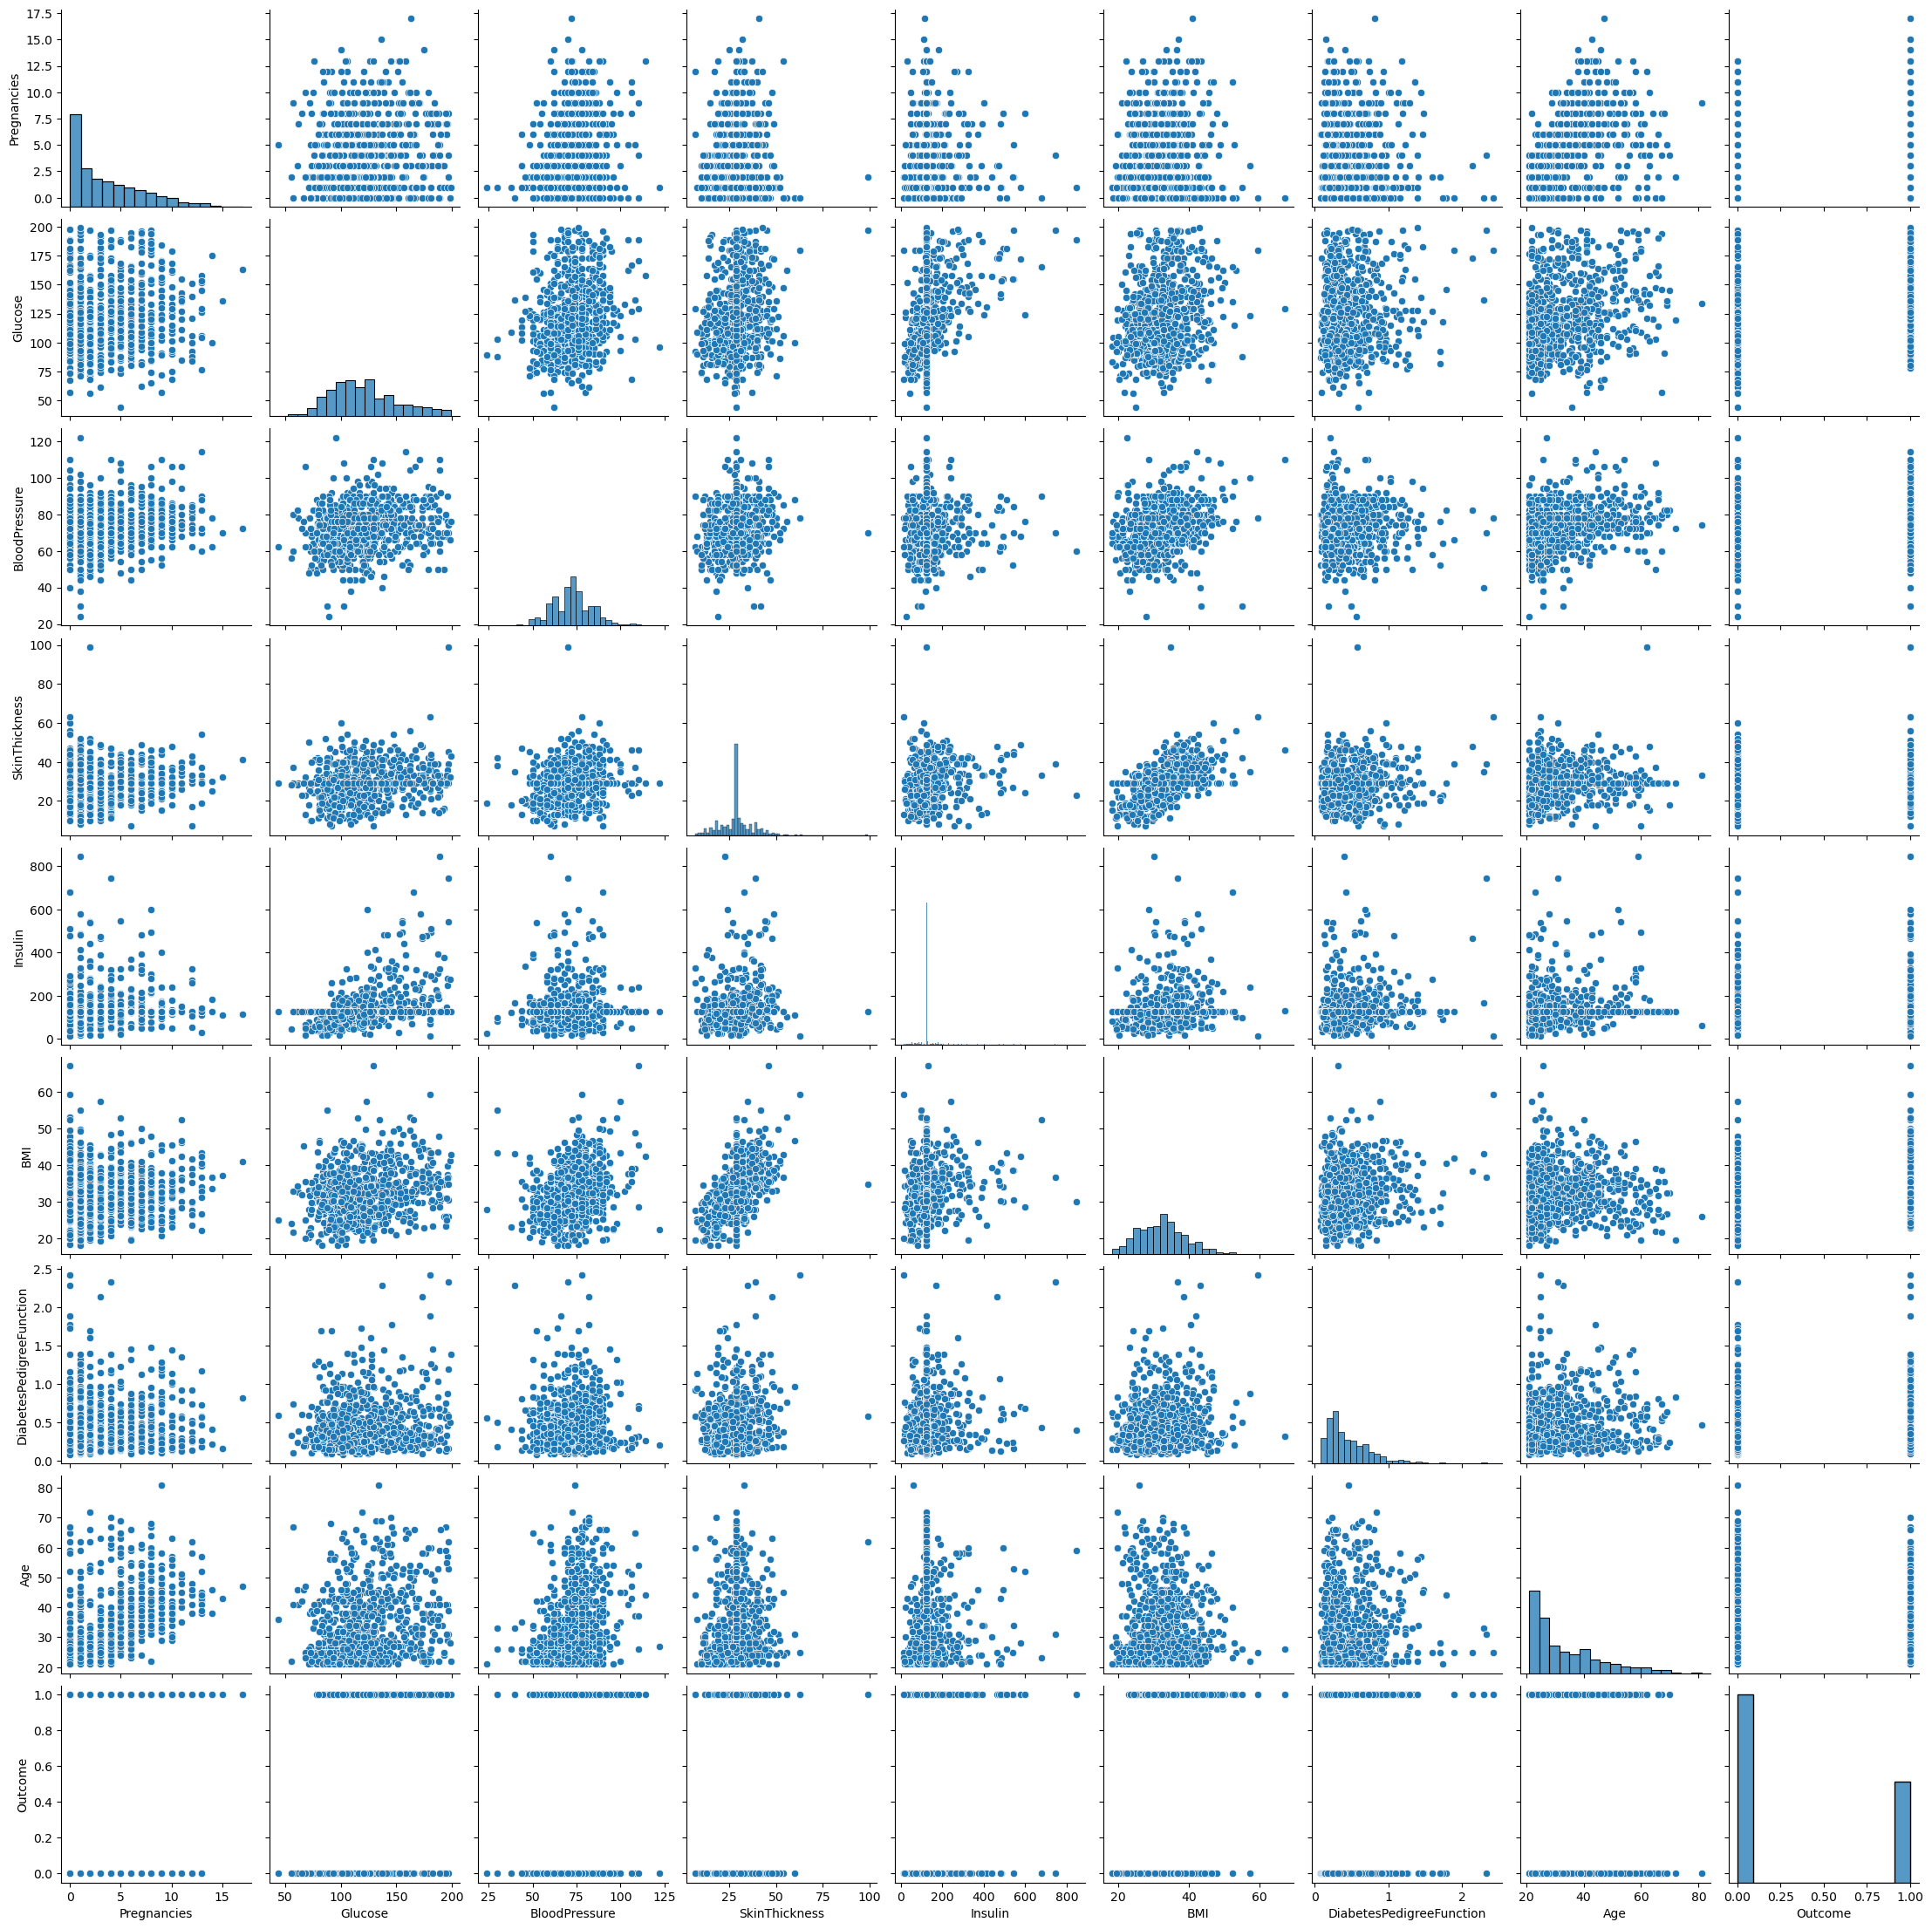

In [129]:
#big picture view of all variable relationships through a pairplot

sns.pairplot(data=data)

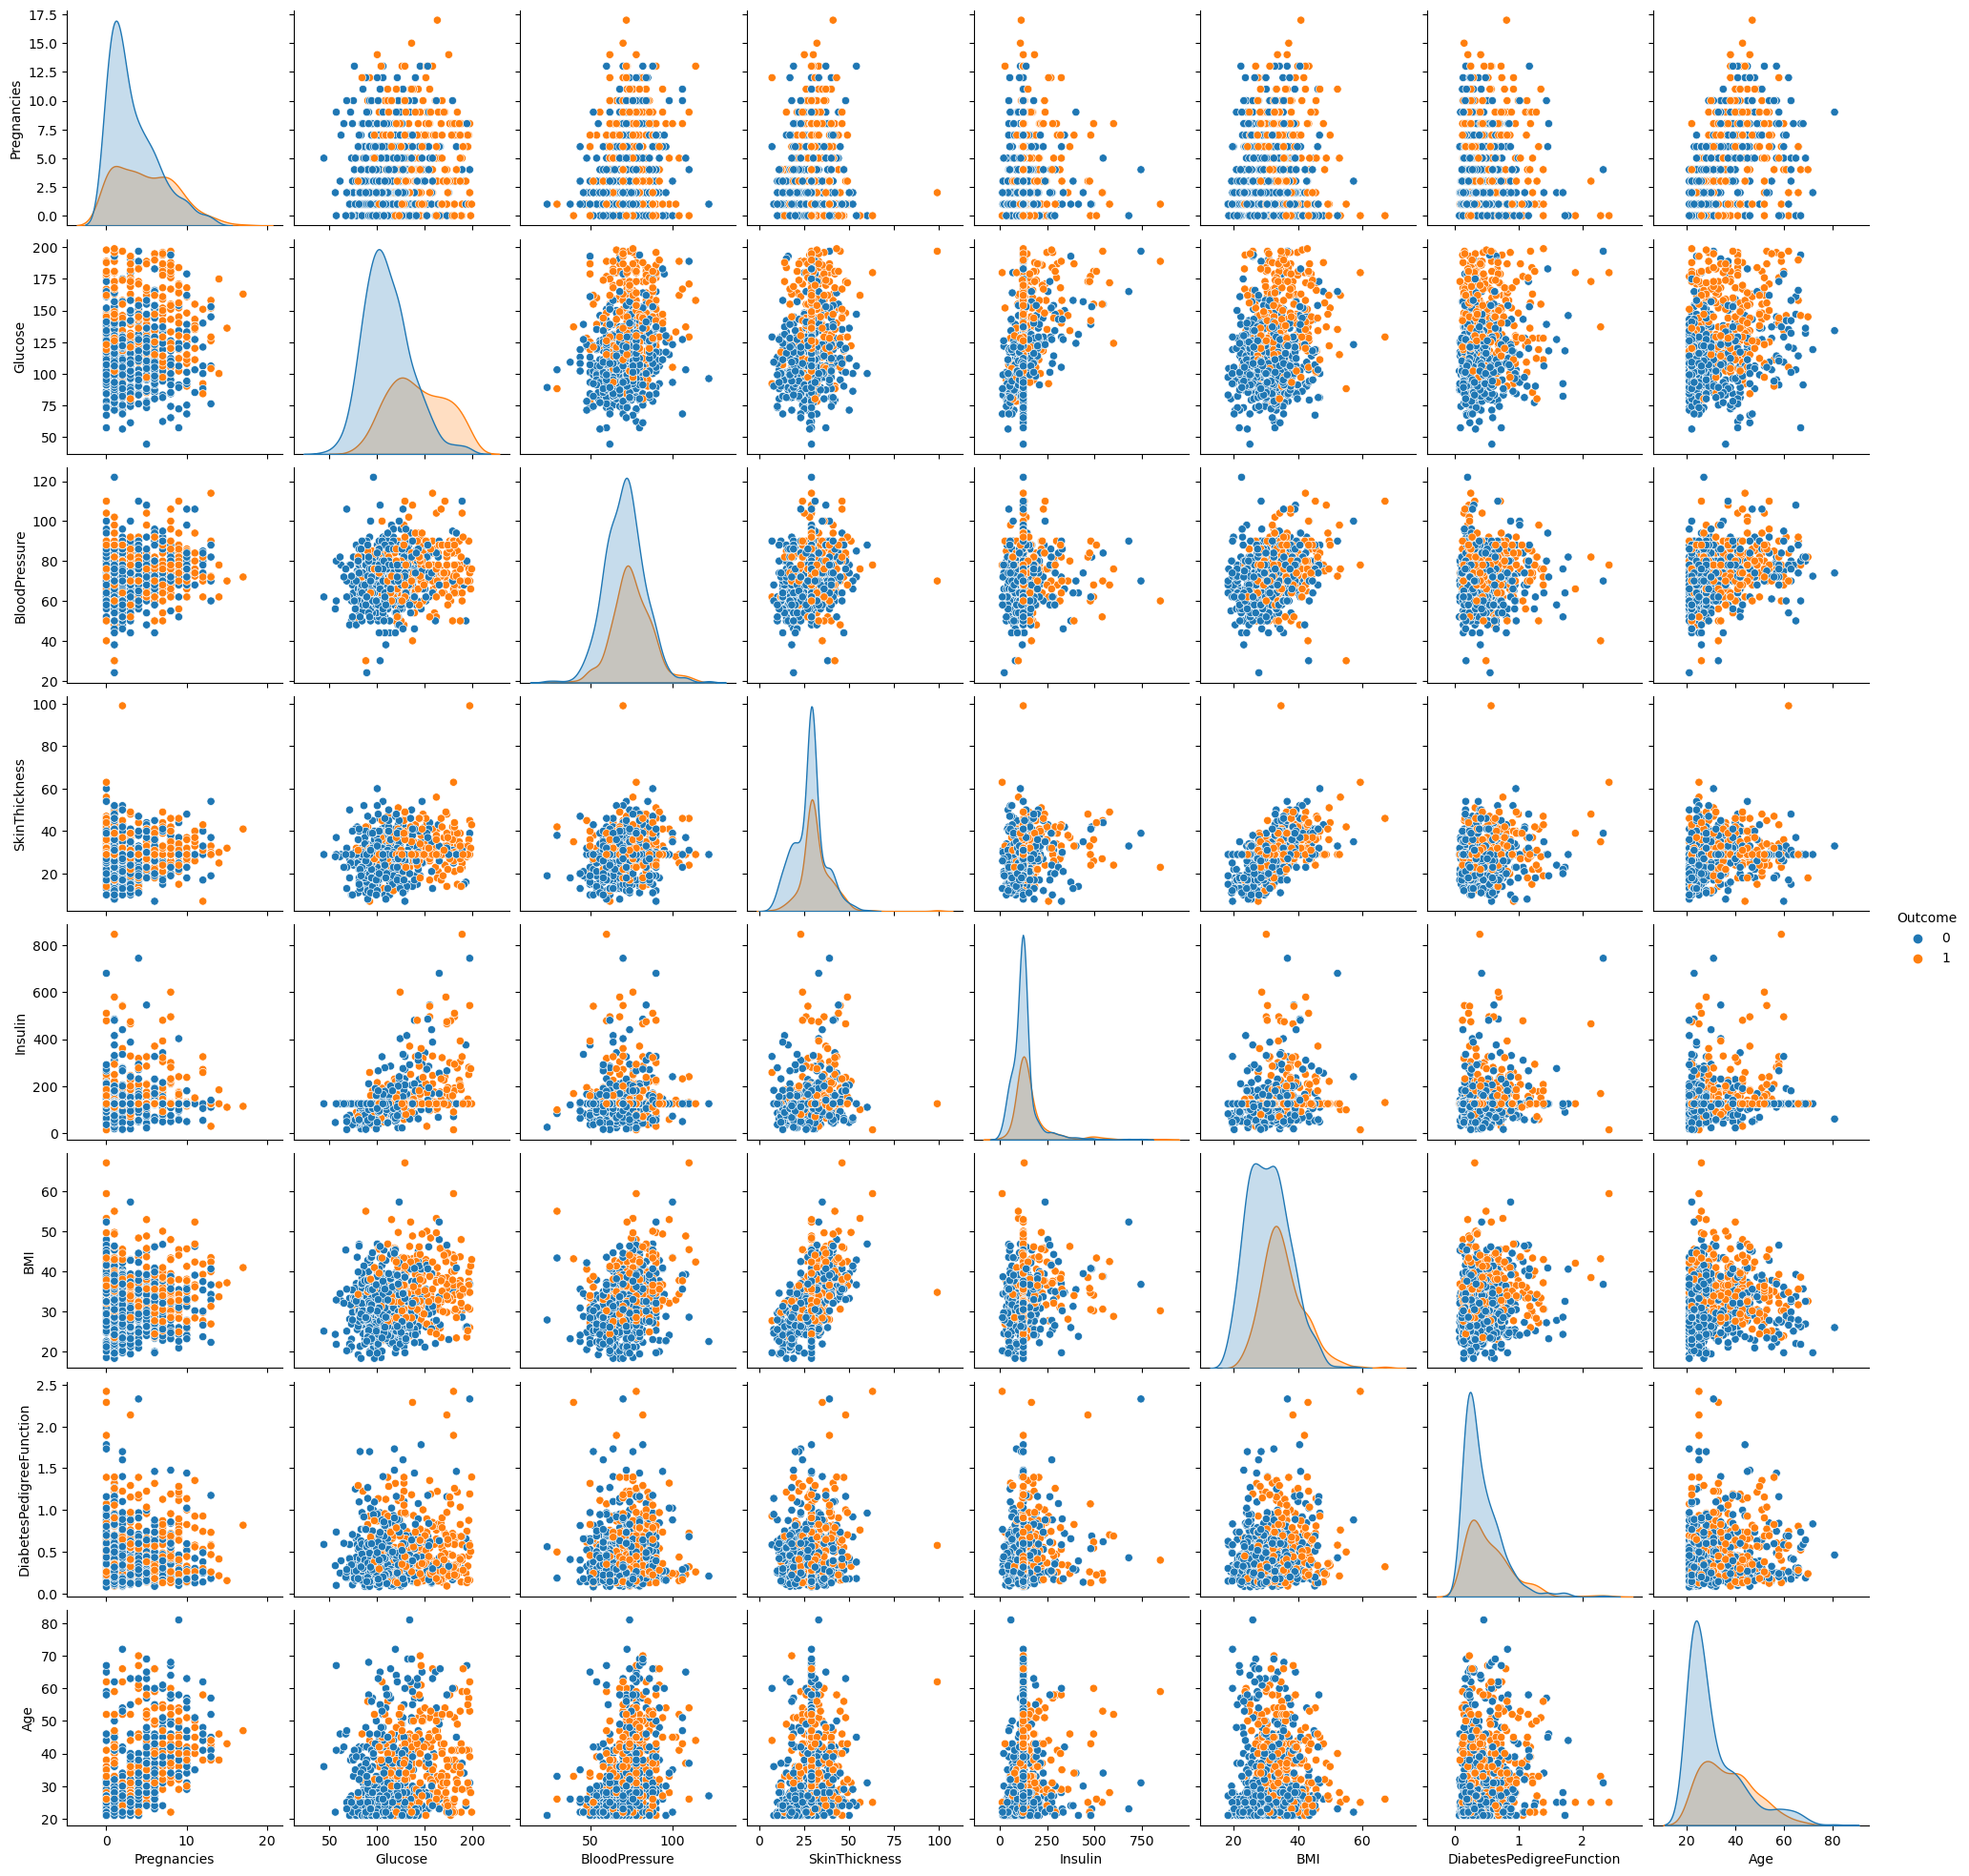

In [130]:
#there do not appear to be strong correlations between variables
#the clearest correlations are between Glucose and Outcome, BMI and SkinThickness, and Age and Pregnancy


#a repeated pairplot to show the data colorcoded with the Outcome variable
#this is done to show the Glucose and Outcome relationship and bring clarity to the others

sns.pairplot(data=data, hue = "Outcome")

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

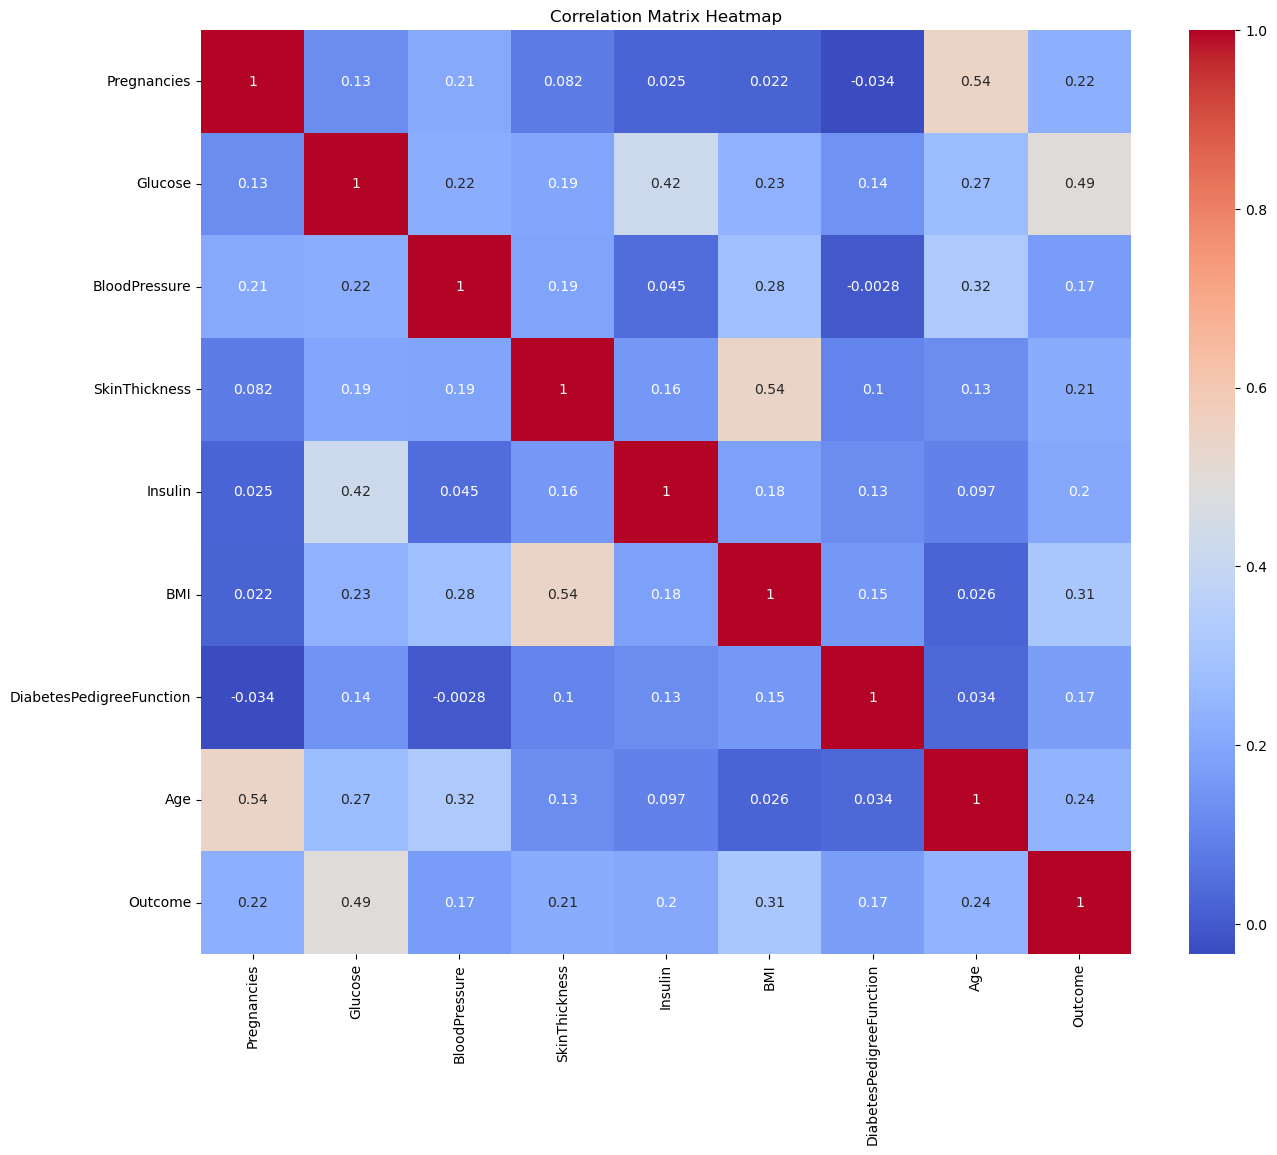

In [131]:
#correlation analysis

corr_matrix = data.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")

In [132]:
#we can see above that the highest correlation for the Outcome variable is Glucose with 0.49
#the 2nd highest is BMI with 0.31 and 3rd highest is Age with 0.24, 4th is Pregnancies with 0.22 Pearson's Coefficient

### This suggests that Glucose is likely a significant predictor of Diabetes, with BMI, Age, Pregnancy, SkinThickness, and Insulin likely moderate predictors. The variables of BloodPressure and DiabetesPedigreeFunction show weak correlations of <0.2 and are likely not good predictors of Diabetes.

In [133]:
#Preprocessing (scaling) data before modeling

#StandardScaler will be used to standardize the data so that the mean is 0 and standard deviation is 1

#importing StandardScaler and all models which will be used for comparison here

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

In [134]:
#scaling the data and setting up the train-test split

scaler = StandardScaler()
sdata = scaler.fit_transform(data.drop("Outcome", axis=1))

X = sdata
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=11)

### Logistic Regression

In [135]:
LR = LogisticRegression()

LR.fit(X_train, y_train).score(X_train, y_train)


0.7690875232774674

In [136]:
#The Accuracy of the Logistic Regression Model is 76.91%

y_predLR = LR.predict(X_test)


#confusion matrix that shows [TN, FP]
                            #[FN, TP]

cmatrix = confusion_matrix(y_test,y_predLR)
cmatrix

array([[137,  12],
       [ 40,  42]], dtype=int64)

In [137]:
#classification report for Logistic Regression Model

"""
Accuracy = (TN + TP)/total     : overall how often the model is correct
Precision = TP/(TP + FP)       : out of all predicted positives, how many are actual positives (FP check)
Sensitivity = TP/(TP + FN)     : out of all actual positives, how many were predicted positive (FN check)
"""

print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       149
           1       0.78      0.51      0.62        82

    accuracy                           0.77       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.77      0.76       231



In [138]:
#ROC AUC Score is calculated based on the True Positive Rate (Sensitivity) and True Negative Rate (Specificity)
#The ROC AUC Score shows how good the model is at distinguishing between two outcomes.

print(roc_auc_score(y_test, y_predLR))

0.7158291045997708


### Logistic Regression Evaluation:
#### Accuracy: 77%
#### Precision: 78%
#### Sensitivity (recall) : 51% 
    This indicates that there were a significant number of False Negatives.
#### ROC-AUC Score: 72%

## Random Forest Classifier

In [139]:
#Random Forest Classifer model

RFC = RandomForestClassifier(n_estimators = 600)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [140]:
#evaluating Random Forest Classifer

y_predRFC = RFC.predict(X_test)

accuracy_score(y_test, y_predRFC)

0.7662337662337663

In [141]:
#confusion matrix that shows [TN, FP]
                            #[FN, TP]

cmatrix = confusion_matrix(y_test,y_predRFC)
cmatrix

array([[134,  15],
       [ 39,  43]], dtype=int64)

In [142]:
#classification report for Random Forest Classifier Model

print(classification_report(y_test,y_predRFC))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       149
           1       0.74      0.52      0.61        82

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.77      0.75       231



In [143]:
#ROC AUC Score

print(roc_auc_score(y_test, y_predRFC))

0.7118595514814209


### Random Forest Classifier Evaluation:
#### Accuracy: 80%
#### Precision: 79%
#### Sensitivity (recall) : 59% 
    This indicates that there were a significant number of False Negatives, although this model performed better than LR.
#### ROC-AUC Score: 75%
    
### Overall, Random Forest performed better on all accounts than Logistic Regression.

## Naive Bayes Classifier

In [144]:
#Naive Bayes Classifer model

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [145]:
#evaluating Naive Bayes Classifer

y_predNB = NB.predict(X_test)

accuracy_score(y_test, y_predNB)

0.7705627705627706

In [146]:
#confusion matrix that shows [TN, FP]
                            #[FN, TP]

cmatrix = confusion_matrix(y_test,y_predNB)
cmatrix

array([[130,  19],
       [ 34,  48]], dtype=int64)

In [147]:
#classification report for Naive Bayes Classifier Model

print(classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       149
           1       0.72      0.59      0.64        82

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [148]:
#ROC AUC Score

print(roc_auc_score(y_test, y_predNB))

0.7289245375675233


### Naive Bayes Classifier Evaluation:
#### Accuracy: 77%
#### Precision: 72%
    Compared to other models, NB had a higher number of False Positives, although not significantly
#### Sensitivity (recall) : 59% 
    This indicates that there were a significant number of False Negatives, same as RFC
#### ROC-AUC Score: 73%
    
### Overall, Naive Bayes seems to be somewhere between Logistic Regression and Random Forest in performance.

## K Nearest Neighbors Classifier

In [149]:
#First, we will systematically find the most accurate k-value between 1-30 to know which to use for model analysis

train_scores = []
test_scores = []

for i in range(1,30):

    KNN = KNeighborsClassifier(i)
    KNN.fit(X_train,y_train)
    
    train_scores.append(KNN.score(X_train,y_train))
    test_scores.append(KNN.score(X_test,y_test))

Text(0.5, 1.0, 'Finding Most Accurate K Neighbors Value')

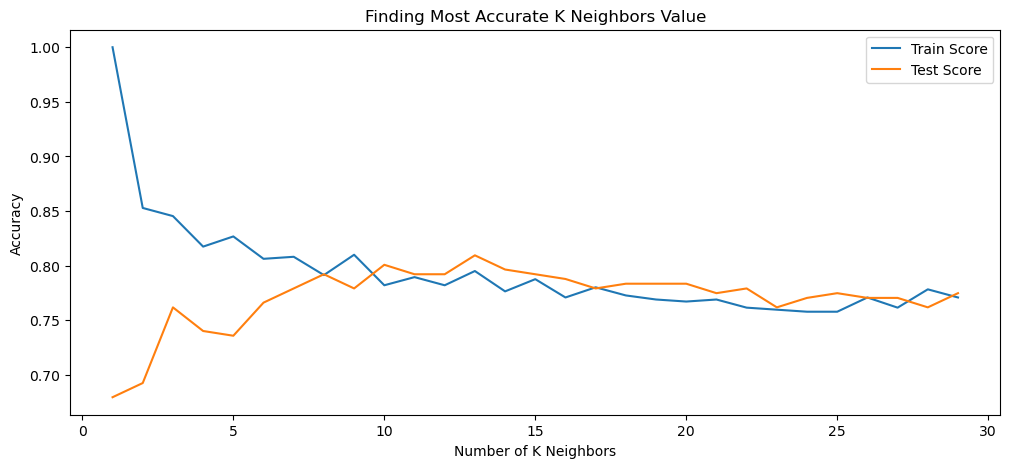

In [158]:
#narrowing down the maximum accuracy k neighbor value

plt.figure(figsize=(12,5))
sns.lineplot(range(1,30), train_scores, label='Train Score')
sns.lineplot(range(1,30), test_scores,  label='Test Score')
plt.xlabel("Number of K Neighbors")
plt.ylabel("Accuracy")
plt.title("Finding Most Accurate K Neighbors Value")

In [162]:
#we can see that the highest accuracy is at k=13 and this will be used for the model

#now we can create our KNN model with k=13

KNN = KNeighborsClassifier(13)

KNN.fit(X_train,y_train)
KNN.score(X_test,y_test)

0.8095238095238095

In [163]:
y_predKNN = KNN.predict(X_test)

In [164]:
#confusion matrix that shows [TN, FP]
                            #[FN, TP]

cmatrix = confusion_matrix(y_test,y_predKNN)
cmatrix

array([[135,  14],
       [ 30,  52]], dtype=int64)

In [165]:
#classification report for K Nearest Neighbors Classifier Model

print(classification_report(y_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       149
           1       0.79      0.63      0.70        82

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231



In [166]:
#ROC AUC Score

print(roc_auc_score(y_test, y_predKNN))

0.7700933049598954


### K Nearest Neighbors Classifier Evaluation:
#### Accuracy: 81%
#### Precision: 79%
#### Sensitivity (recall) : 63% 
    This is by far the highest Sensitivity between all models, indicating a lower number of False Negatives.
#### ROC-AUC Score: 77%
    
### Overall, K Nearest Neighbors Classifier is the highest performing model with all stats being above others.

In [167]:
#ROC curve - this shows how good the model is at distinguishing between two choices visually

y_pred_probKNN = KNN.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probKNN)

(0.0, 1.0)

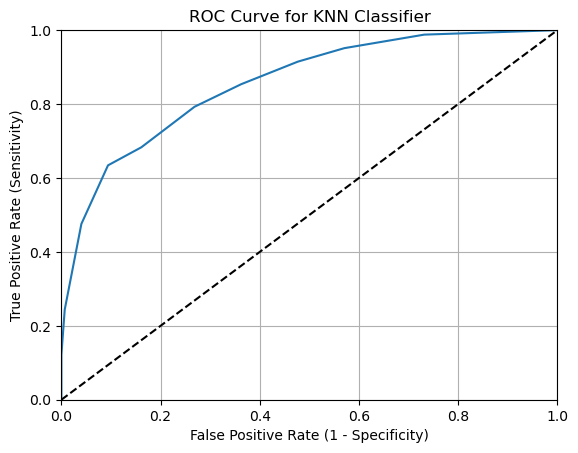

In [172]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('ROC Curve for KNN Classifier (k=13)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

In [ ]:
#Overall this with the ROC-AUC score of 77%, shows that the KNN Classifier model is good at predicting between Outcomes
#The KNN model is best at distinguishing between non-diabetic and diabetic data points

In [175]:
#saving the cleaned and wrangled data into a csv for analysis in Tableau


from pathlib import Path  
filepath = Path(r"C:\Users\karol\Desktop\data analyst\caltech bootcmap\course 8 - capstone project\clean healthcare data.csv")  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)  
